In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import chardet, glob
import seaborn as sns
#%matplotlib widget
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
   # for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install glob2

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 4.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
df_overview = pd.read_excel('dataset/Overview.xlsx')
df_overview = df_overview.drop(['Unnamed: 13','Note'], axis=1)
df_overview = df_overview.dropna()
df_overview.rename(columns = {'Unnamed: 8':'SoC difference'}, inplace = True)
df_overview.head()

Trip                 Date   Route/Area Weather  \
0  TripA01  2019-06-25_13-21-14  Munich East   sunny   
1  TripA02  2019-06-25_14-05-31  Munich East   sunny   
2  TripA03  2019-06-28_10-02-15  Munich East   sunny   
3  TripA04  2019-06-28_10-13-30  Munich East   sunny   
4  TripA05  2019-06-28_10-20-26  Munich East   sunny   

   Battery Temperature (Start) [°C]  Battery Temperature (End)  \
0                              21.0                       22.0   
1                              23.0                       26.0   
2                              24.0                       25.0   
3                              25.0                       27.0   
4                              27.0                       27.0   

   Battery State of Charge (Start)  Battery State of Charge (End)  \
0                            0.863                          0.803   
1                            0.803                          0.673   
2                            0.835                          0.751   
3                            0.751                          0.667   
4                            0.667                          0.602   

   SoC difference  Ambient Temperature (Start) [°C]  Target Cabin Temperature  \
0           0.060                              25.5                      23.0   
1           0.130                              32.0                      23.0   
2           0.084                              21.5                      27.0   
3           0.084                              24.0                      22.0   
4           0.065                              24.5                      24.0   

   Distance [km]  Duration [min]                 Fan  
0       7.427690       16.820000  Automatic, Level 1  
1      23.509709       23.550000  Automatic, Level 1  
2      12.820846       11.180000  Automatic, Level 1  
3      10.727491        6.870000  Automatic, Level 1  
4      12.393223       22.776667  Automatic, Level 1

In [10]:
def combine_csvs():
    ''' Combine all csv datasets into a single file'''
    df_master = pd.DataFrame()
    for filename in glob.glob('/kaggle/input/battery-and-heating-data-in-real-driving-cycles/'+'*.csv'):
        df_trip = pd.read_csv(
            filename,
            sep=';',
            encoding=chardet.detect(open(filename, 'rb').read())['encoding']
        )
        df_master = pd.concat([df_master, df_trip])
        df_master.to_csv('/kaggle/input/alltrips1csv/AllTrips1.csv', index=False)
    return df_master


def plot_dataframe_subplots(df, nrows, ncols, figsize=(30, 24)):
    """Plot a nrows x ncols grid of the df variables"""
    measurements = list(df.columns)
    plt.figure(figsize=figsize)
    for idx, key in enumerate(measurements):
        plt.subplot(nrows, ncols, idx+1)
        plt.plot(np.array(range(df.shape[0]))*0.1, df[key])
        plt.ylabel(key)
        plt.grid(True)
        plt.xlabel(measurements[0])
        plt.show

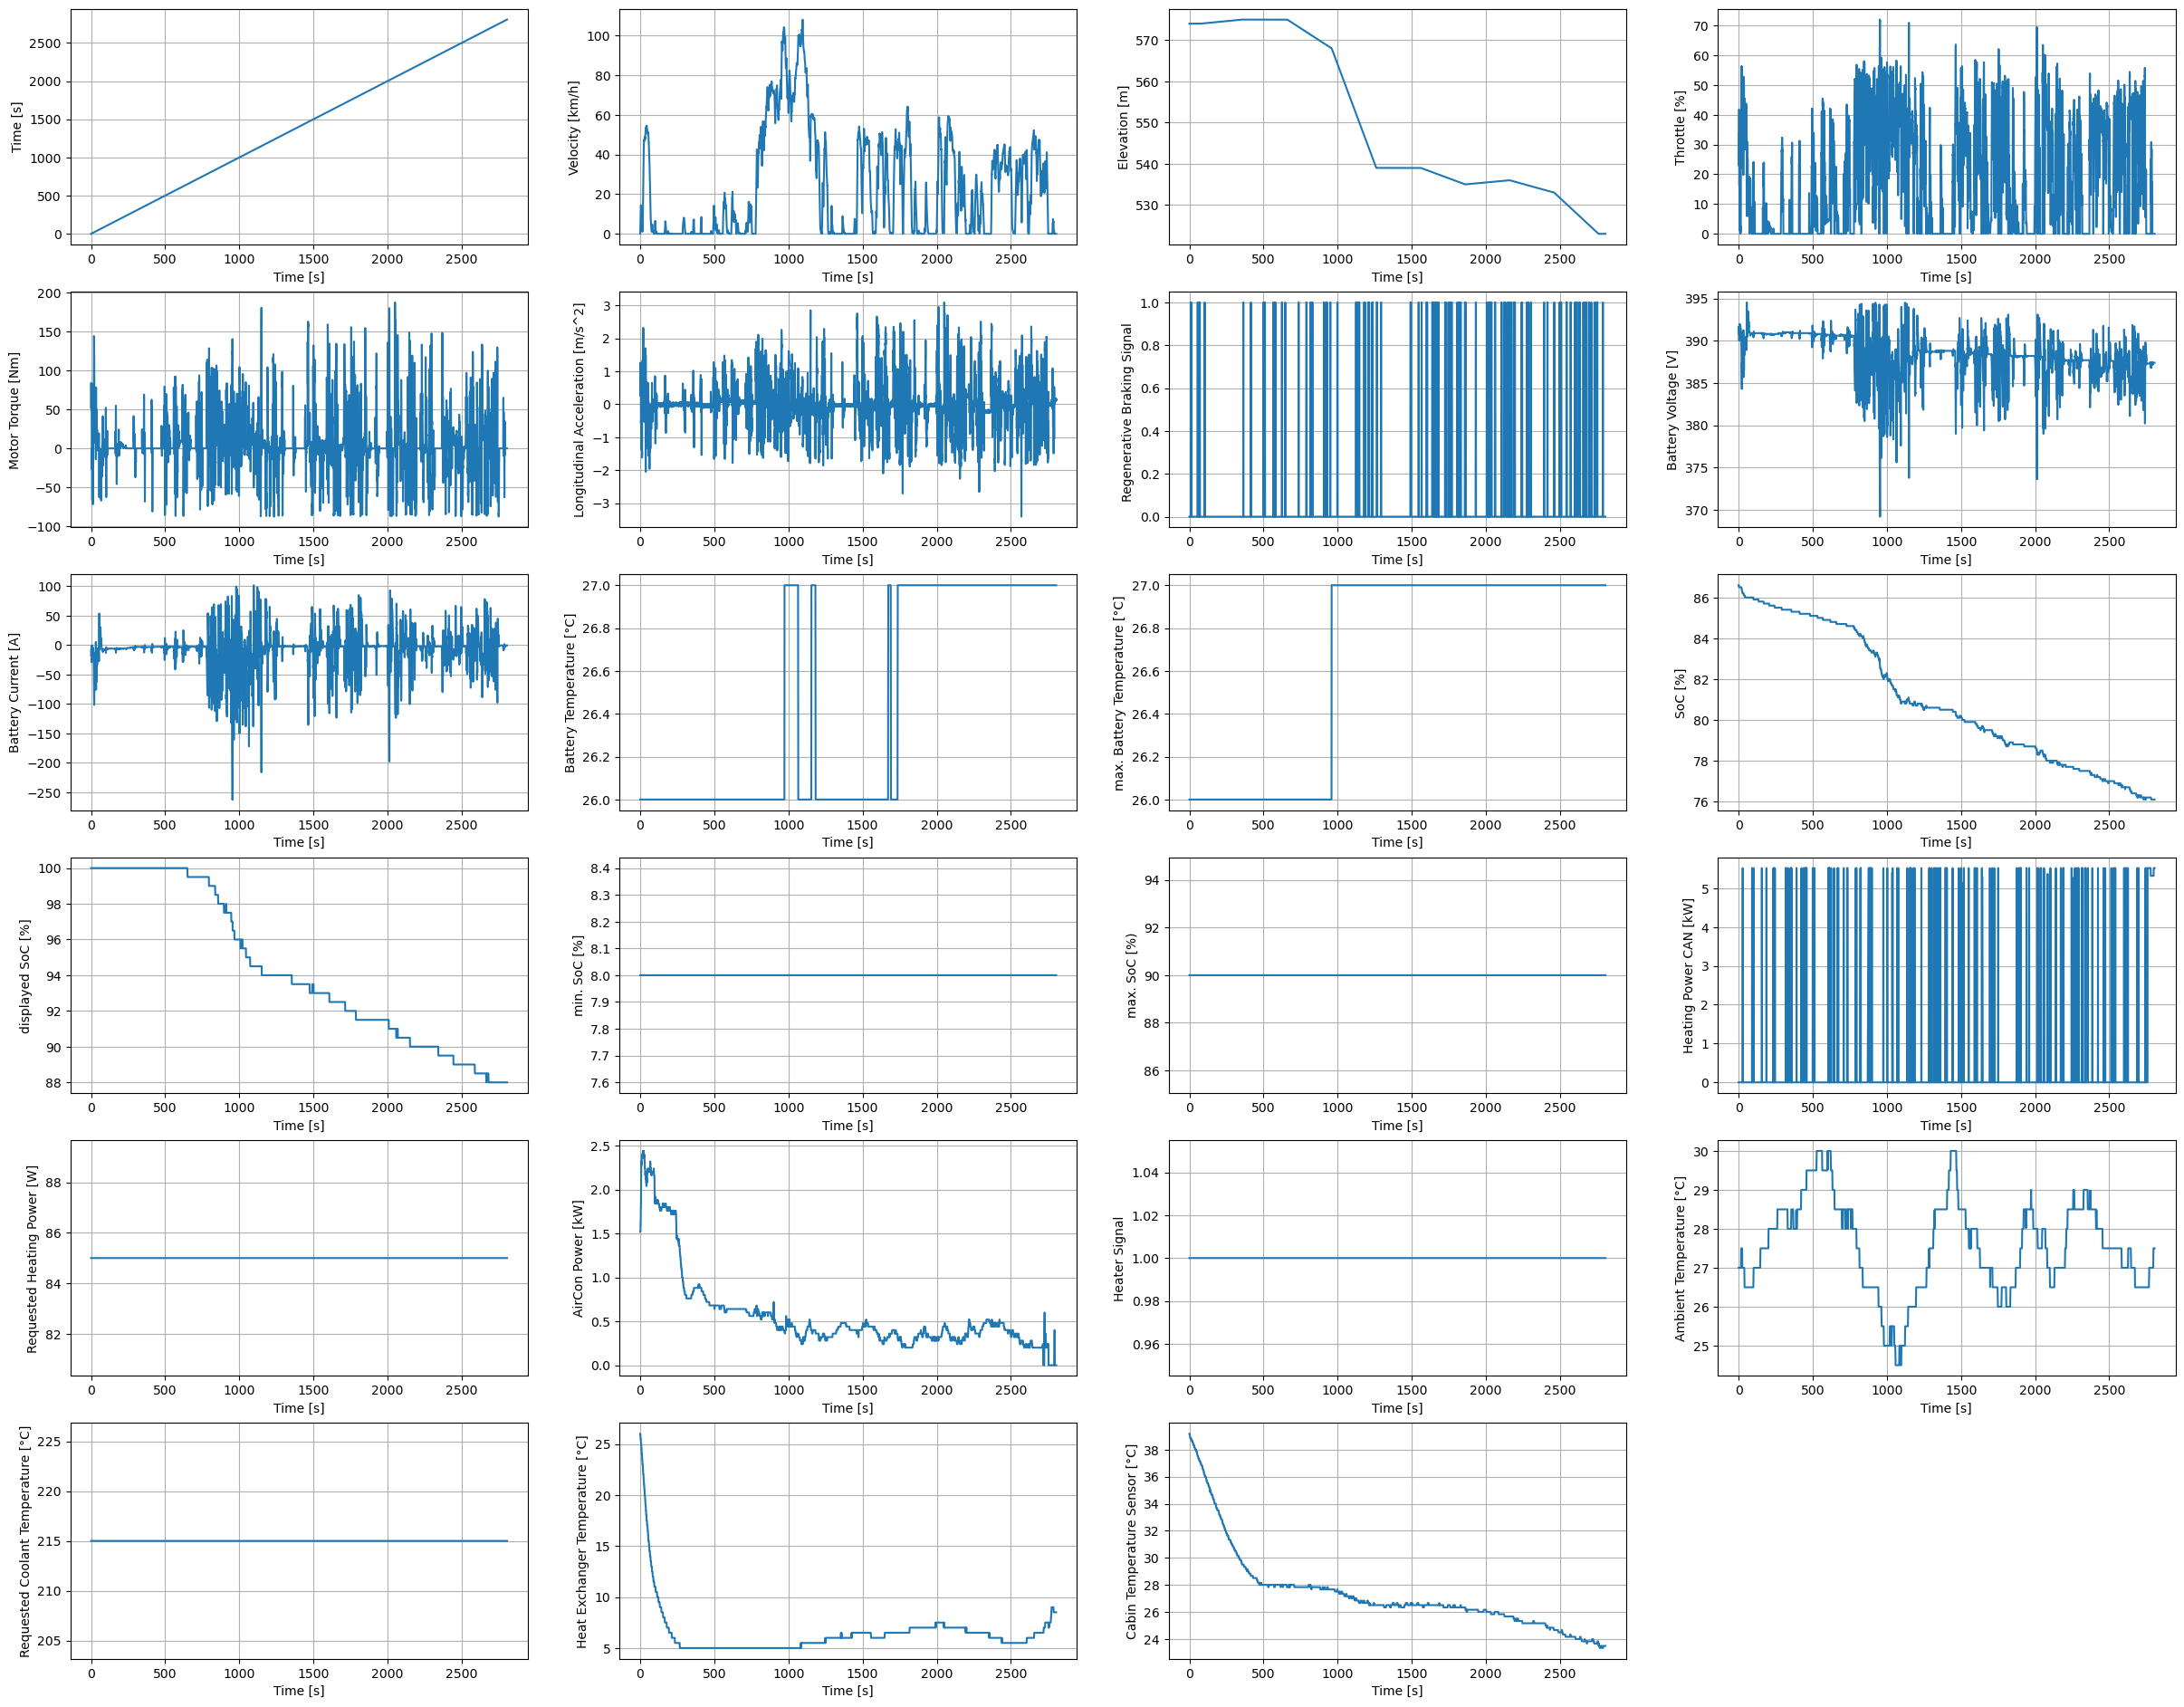

In [12]:
#Single trip
df_trip = pd.read_csv(
    'dataset/TripA08.csv',
    sep=';',
    encoding=chardet.detect(open(f'dataset/TripA08.csv', 'rb').read())['encoding']
)
# Plot results of a single trips
plot_dataframe_subplots(df_trip, nrows=12, ncols=4, figsize=(30, 48))

In [13]:
# Load in the dataset
if os.path.exists('AllTrips1.csv'):
    df_master = pd.read_csv('AllTrips1.csv')
#else: df_master = combine_csvs()

# Remove last 2 columns since they are Nan
df_master = df_master.iloc[: , :-2]
print(list(df_master.columns.values))

['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]', 'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'Heating Power LIN [W]', 'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]', 'Heater Current [A]', 'Ambient Temperature [°C]', 'Ambient Temperature Sensor [°C]', 'Coolant Temperature Heatercore [°C]', 'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]', 'Coolant Volume Flow +500 [l/h]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]', 'Temperature Coolant Heater Inlet [°C]', 'Temperature Coolant Heater Outlet [°C]', 'Temperature Heat Exchanger Outlet [°C]', 'Temperature Defrost lateral left [°C]', 'Temperature Defrost lateral right [°C]', 'Temperature Defrost centr

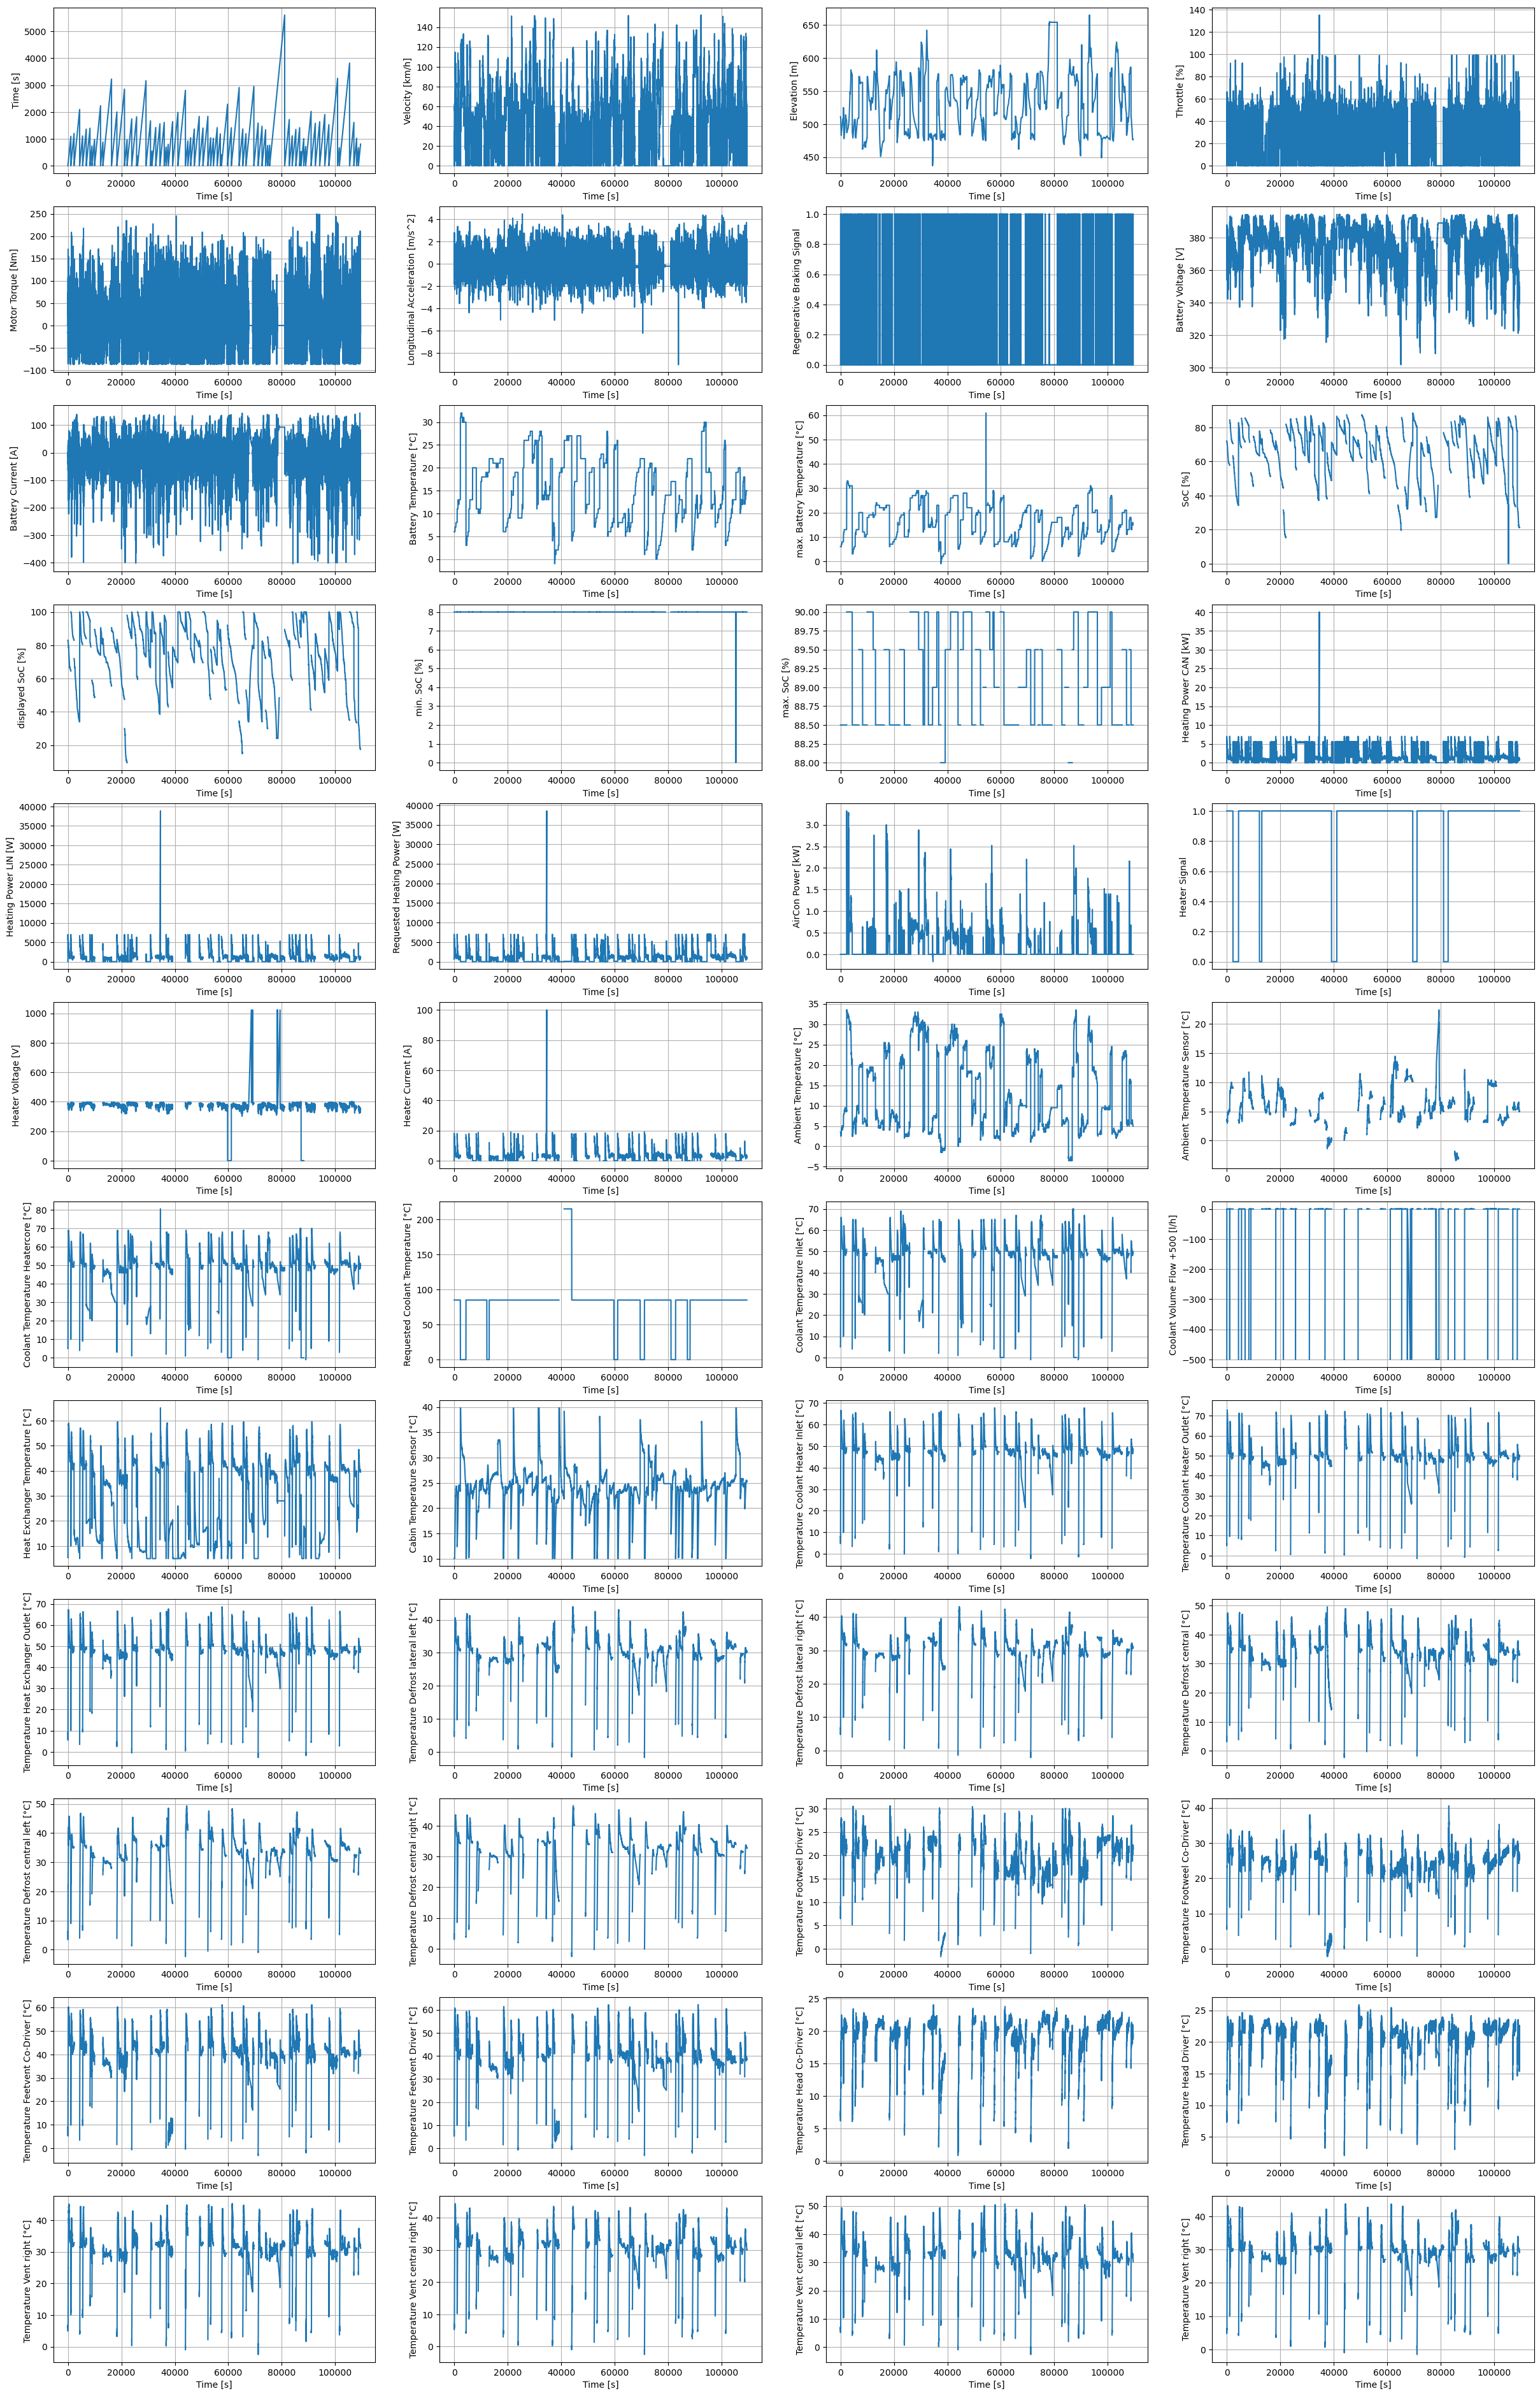

In [14]:
plot_dataframe_subplots(df_master, nrows=12, ncols=4, figsize=(30,48))

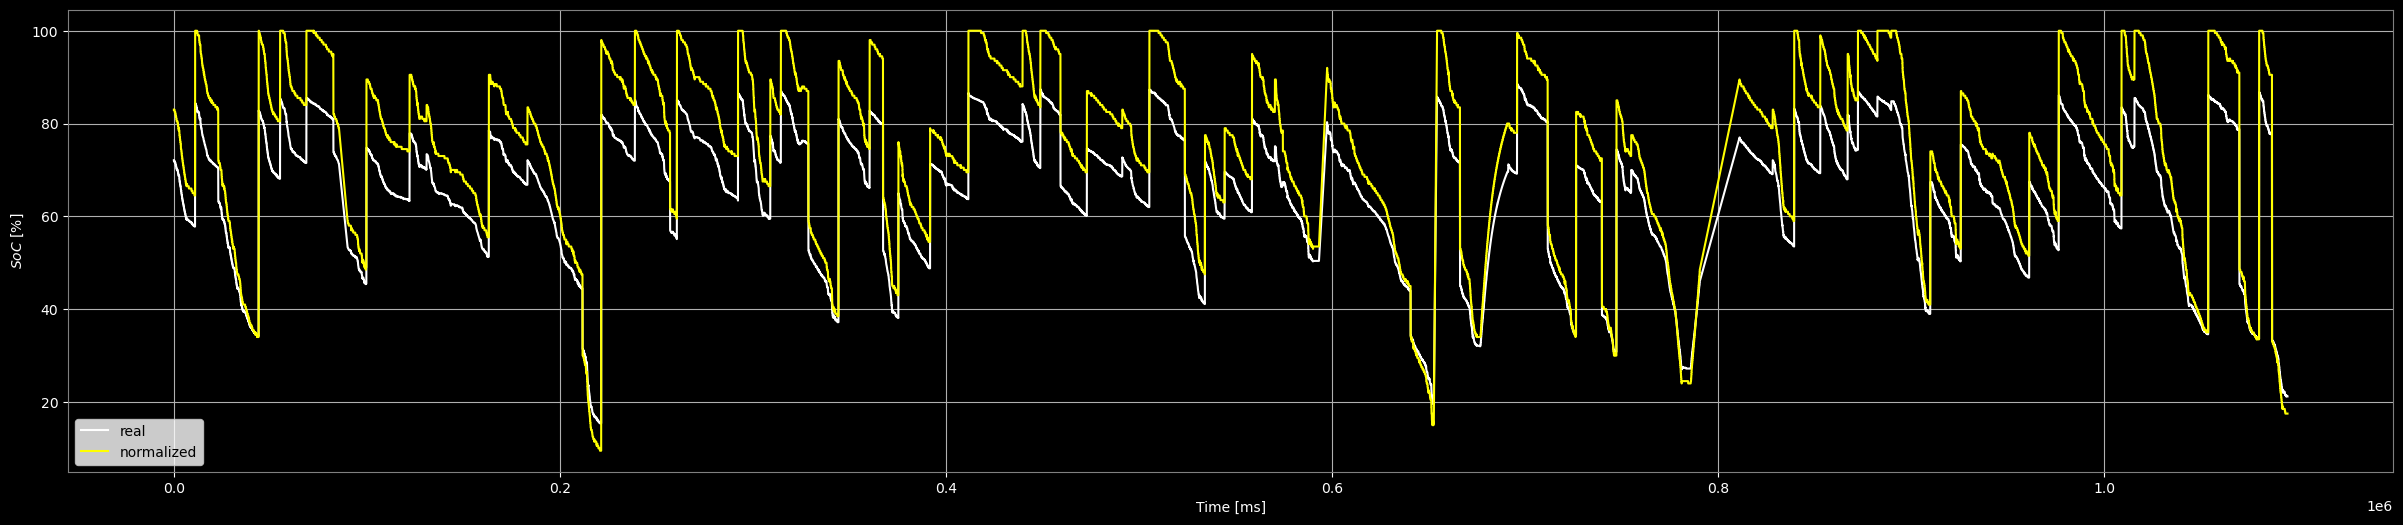

In [15]:
df_soc = df_master[['SoC [%]', 'displayed SoC [%]']].dropna()

# Let us look at battery SoC degradation over vehicle exploitation
plt.figure(figsize=(30, 6), facecolor='black')
ax = plt.axes()
ax.set_facecolor("black")
ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.tick_params(colors='white', which='both')
plt.grid(True)

plt.plot(df_soc['SoC [%]'], color="white")
plt.plot(df_soc['displayed SoC [%]'], color="yellow")
plt.xlabel('Time [ms]', color='white')
plt.ylabel('$SoC$ [%]', color='white')
plt.legend(['real','normalized'])

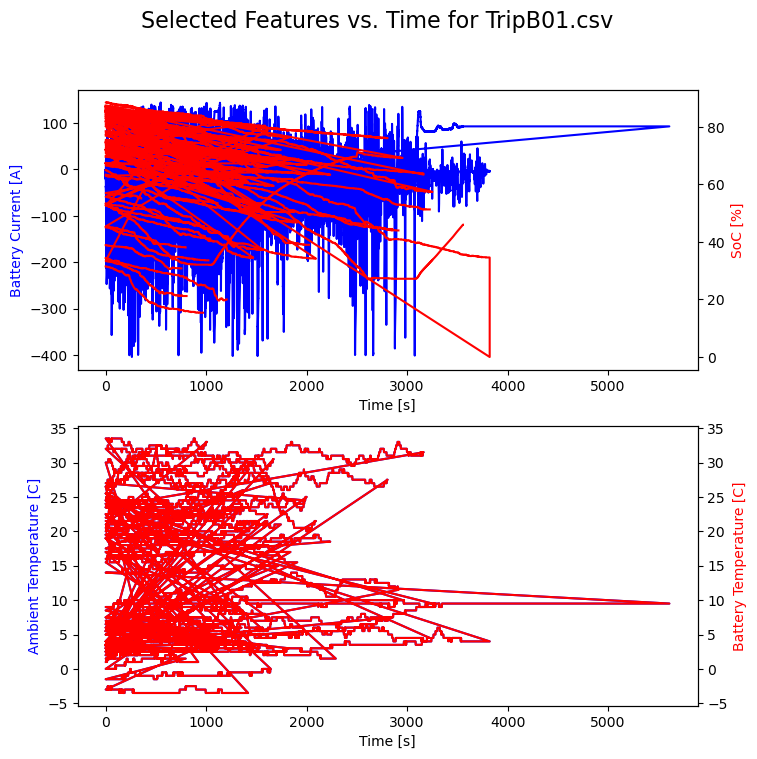

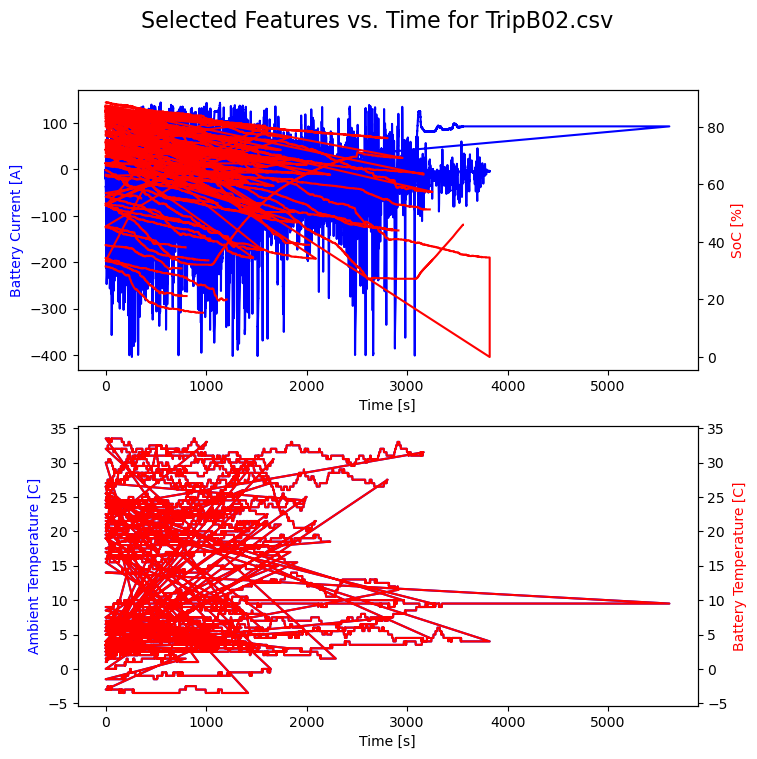

In [17]:
for trip in ['TripB01', 'TripB02']:
    df_trip = df_master

    # create figure and axes objects
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

    # plot battery current and SoC on shared axis
    axs[0].plot(df_trip['Time [s]'], df_trip['Battery Current [A]'], color='blue')
    axs0_2 = axs[0].twinx()
    axs0_2.plot(df_trip['Time [s]'], df_trip['SoC [%]'], color='red')
    axs[0].set_xlabel('Time [s]')
    axs[0].set_ylabel('Battery Current [A]', color='blue')
    axs0_2.set_ylabel('SoC [%]', color='red')

    # plot ambient and battery temperature on shared axis
    axs[1].plot(df_trip['Time [s]'], df_trip['Ambient Temperature [°C]'], color='blue')
    axs1_2 = axs[1].twinx()
    axs1_2.plot(df_trip['Time [s]'], df_trip['Ambient Temperature [°C]'], color='red')
    axs[1].set_xlabel('Time [s]')
    axs[1].set_ylabel('Ambient Temperature [C]', color='blue')
    axs1_2.set_ylabel('Battery Temperature [C]', color='red')

    fig.suptitle('Selected Features vs. Time for ' + trip + '.csv', fontsize=16)
    plt.savefig('dataset/' + trip + '.pdf' , format='pdf', bbox_inches='tight')


In [18]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


Computing feature correlation matrix...


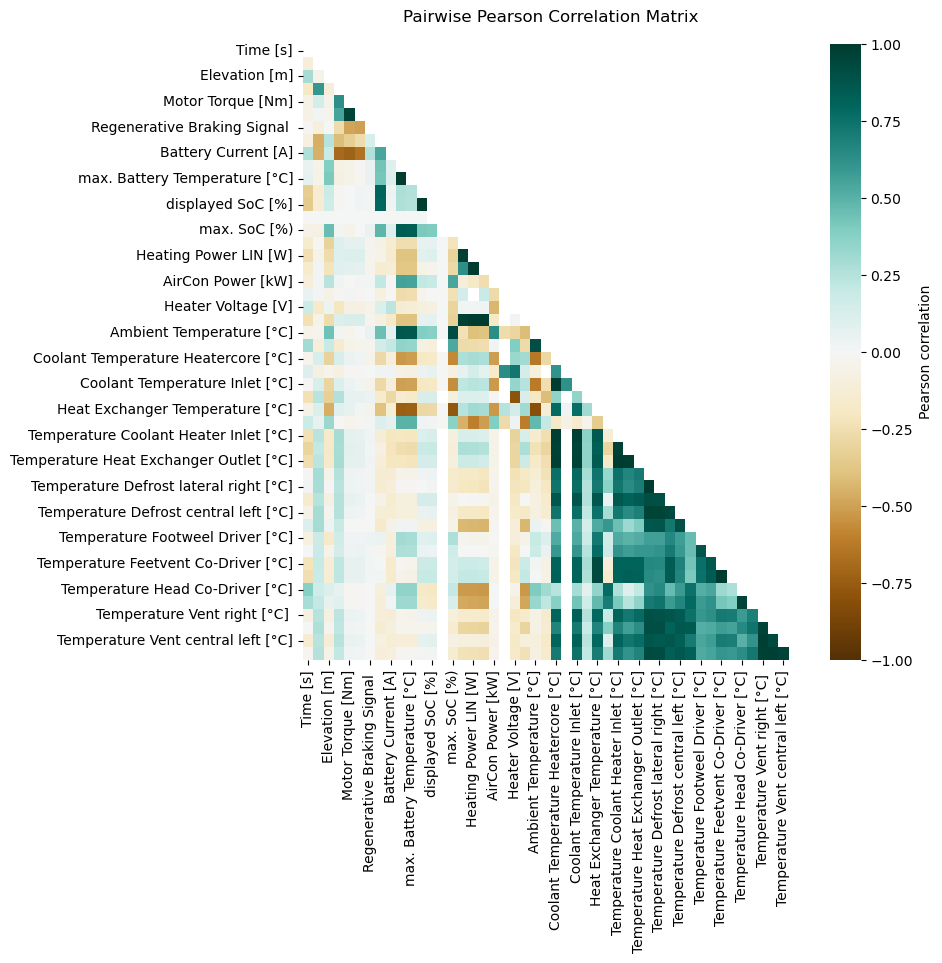

In [20]:
print('Computing feature correlation matrix...')
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(df_master.corr(method='pearson'), dtype=bool))
sns_plot1 = sns.heatmap(df_master.corr(method='pearson'), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG', cbar_kws={'label': 'Pearson correlation'})
sns_plot1.set_title('Pairwise Pearson Correlation Matrix', fontdict={'fontsize':12}, pad=16);
# plt.show() # blocks execution
sns_plot1.figure.savefig('dataset/' + 'feature-correlation-matrix.pdf', format='pdf', bbox_inches='tight')

<Axes: >

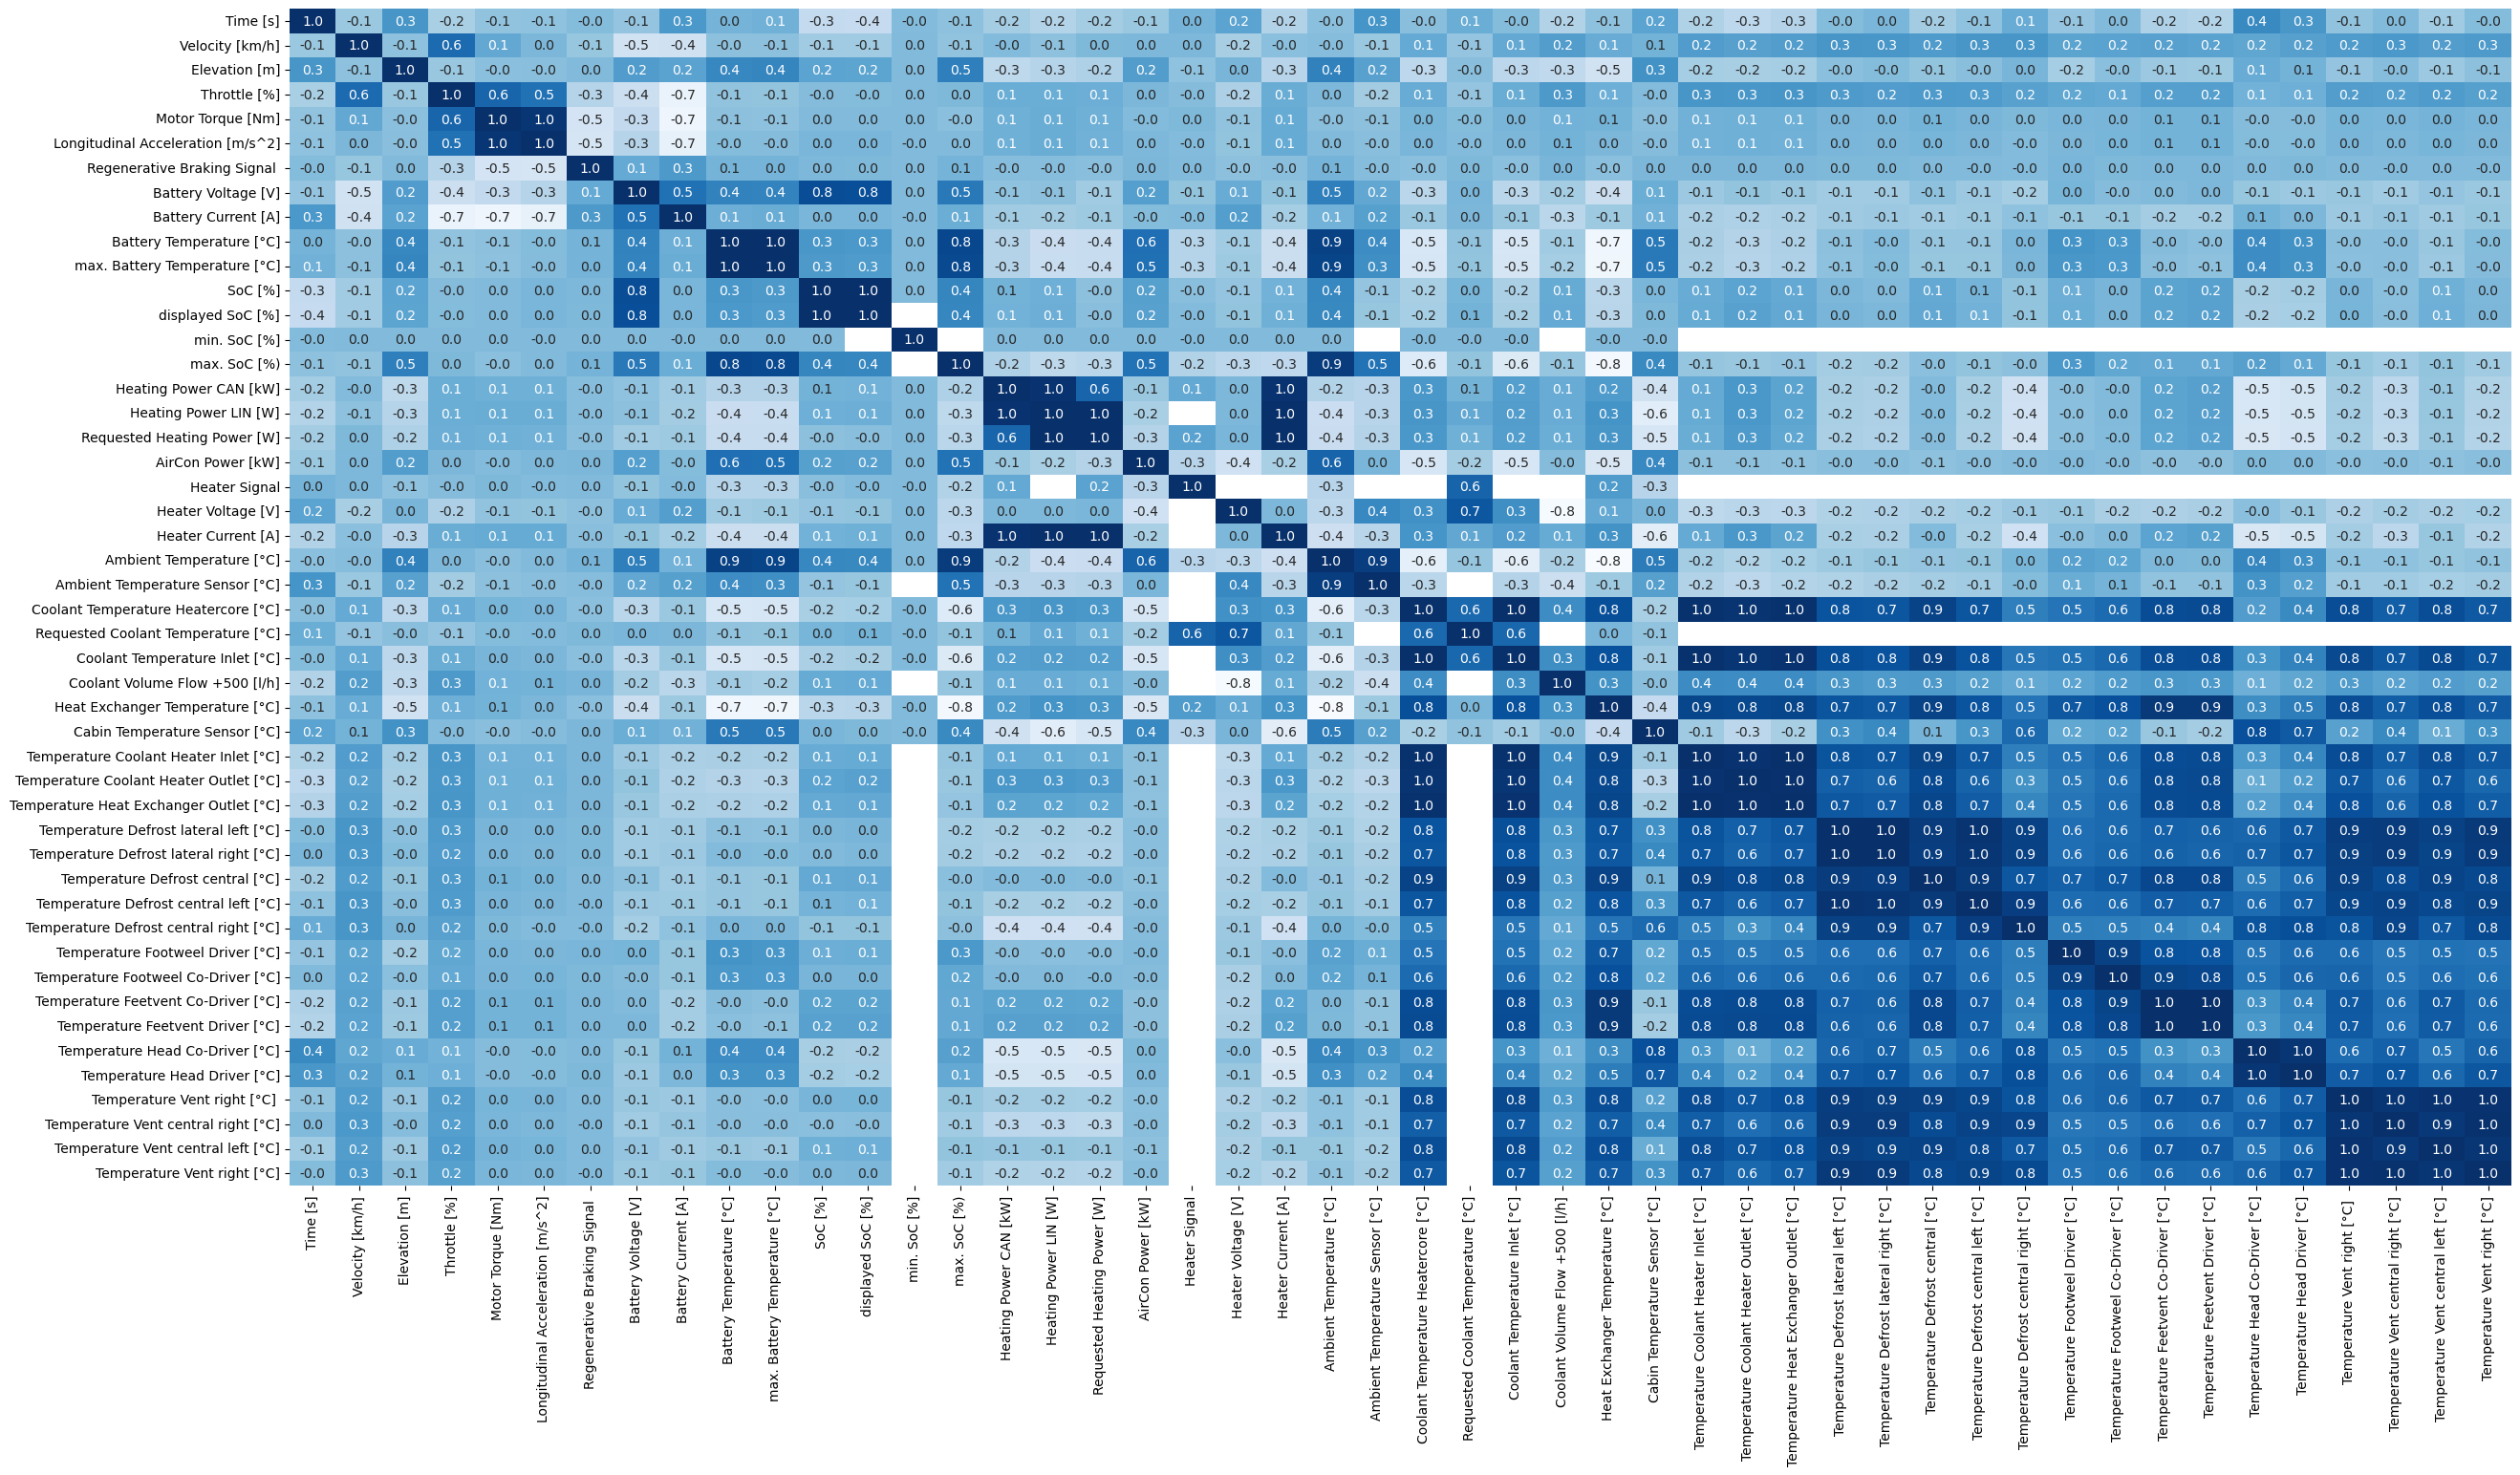

In [21]:
plt.figure(figsize=(30, 16))
sns.heatmap(df_master.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')


In [22]:
def set_negative_plot_color():
    plt.figure(figsize=(30, 6), facecolor='black')
    ax = plt.axes()
    ax.set_facecolor("black")
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.tick_params(colors='white', which='both')
    plt.grid(True)

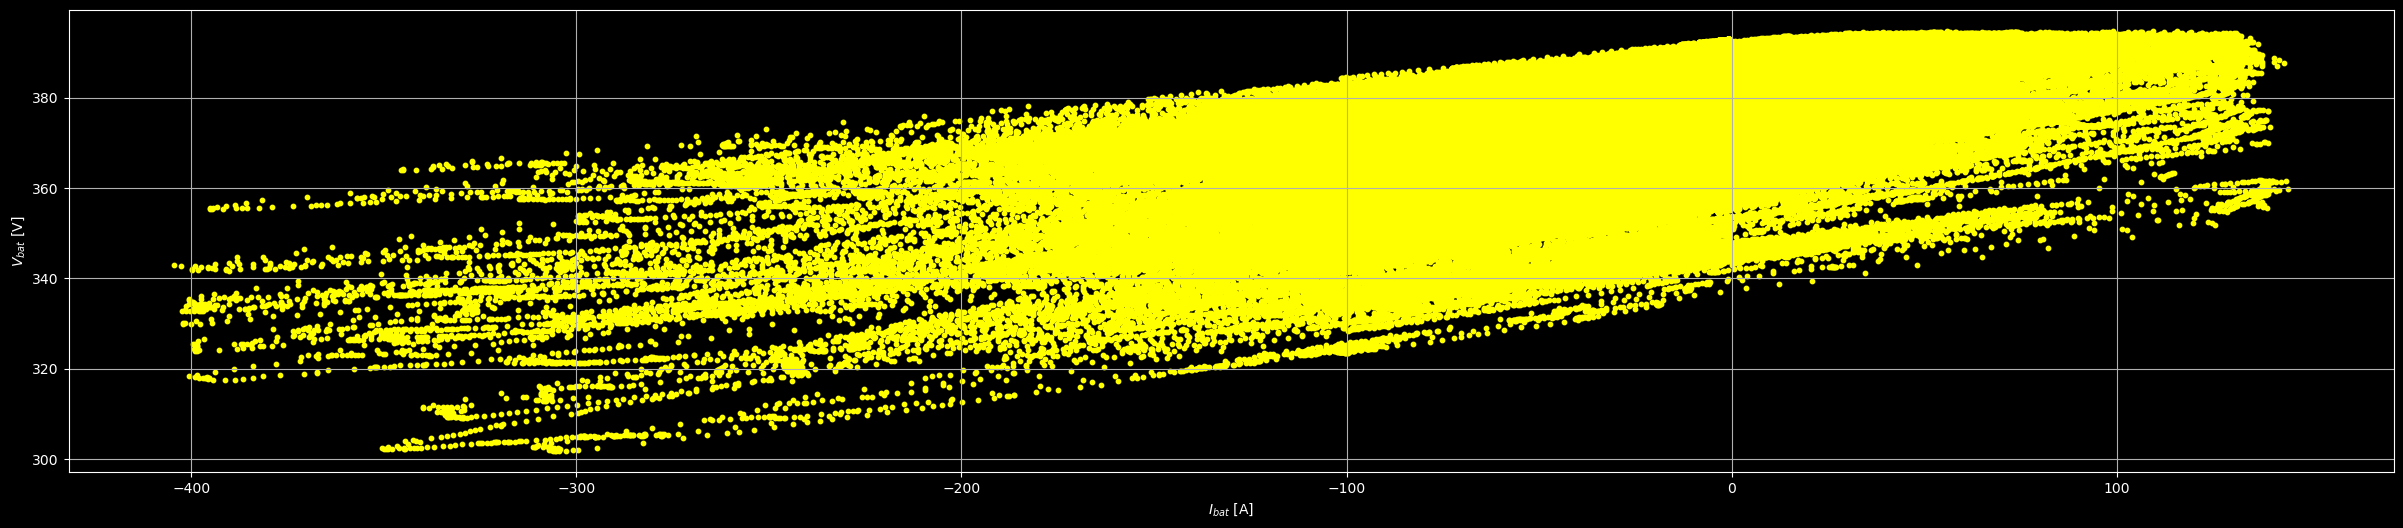

In [23]:
set_negative_plot_color()
plt.scatter(df_master['Battery Current [A]'], df_master['Battery Voltage [V]'], color="yellow", s=10)
plt.xlabel('$I_{bat}$ [A]', color='white')
plt.ylabel('$V_{bat}$ [V]', color='white');

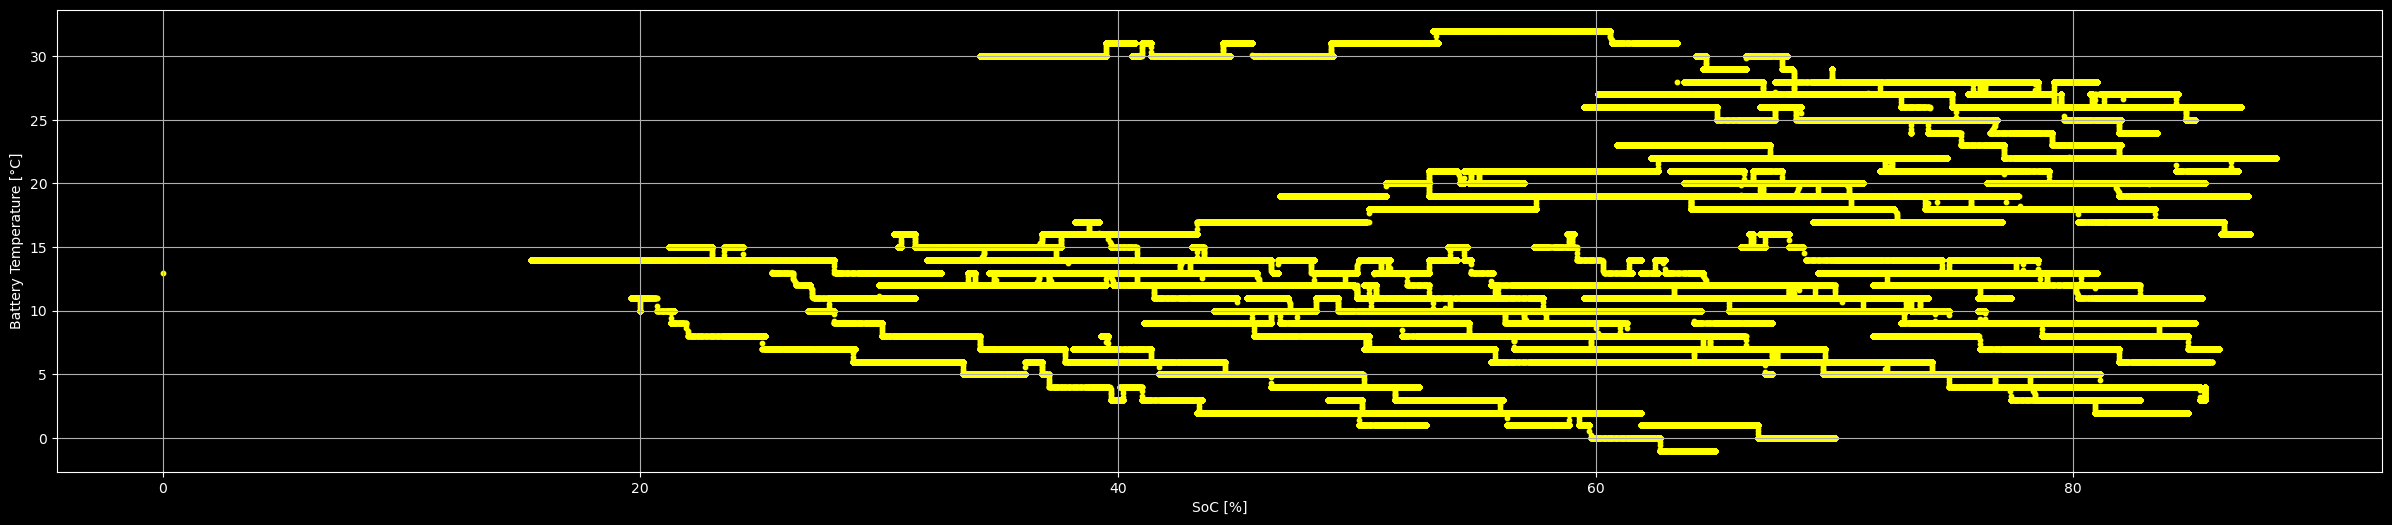

In [24]:
set_negative_plot_color()
plt.scatter(df_trip['SoC [%]'], df_trip['Battery Temperature [°C]'], color="yellow", s=10)
plt.xlabel('SoC [%]', color='white')
plt.ylabel('Battery Temperature [°C]', color='white');

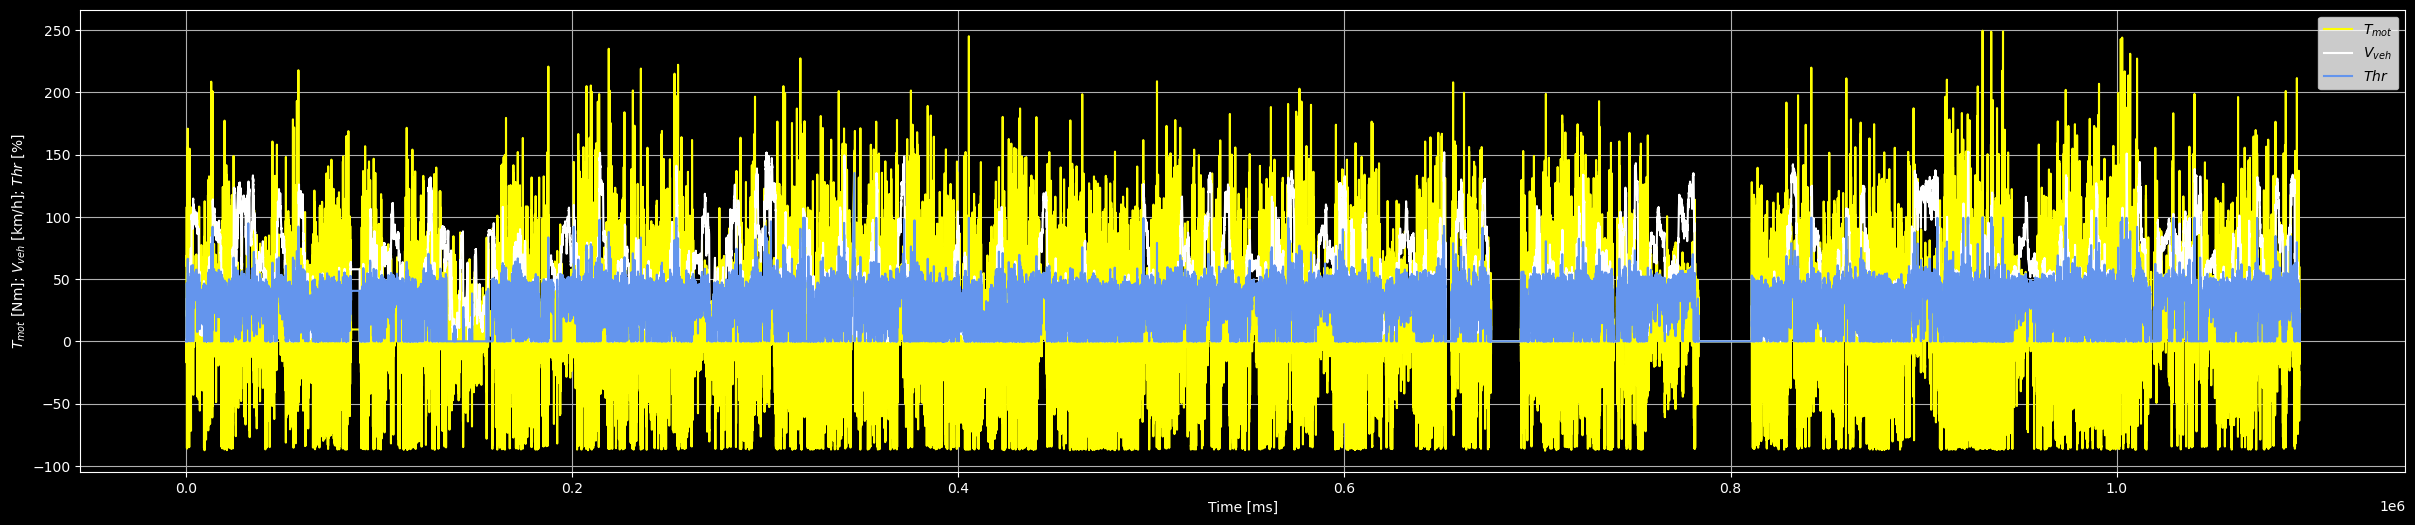

In [25]:
set_negative_plot_color()
plt.plot(df_trip['Motor Torque [Nm]'], color="yellow")
plt.plot(df_trip['Velocity [km/h]'], color="white")
plt.plot(df_trip['Throttle [%]'], color="cornflowerblue")
plt.xlabel('Time [ms]', color='white')
plt.ylabel('$T_{mot}$ [Nm]; $V_{veh}$ [km/h]; $Thr$ [%]', color='white')
plt.legend(['$T_{mot}$','$V_{veh}$','$Thr$']);